In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from data.augmentation import PLAYER_LABEL, BALL_LABEL
from data import soccer_net
from image import image

/Users/aleksandernagaj/.venv/FootAndBall/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
soccer_net_path = "/Users/aleksandernagaj/DTU/02456/data/soccer_net/tracking/train/"

sn = soccer_net.SoccerNet(soccer_net_path)
sn.collect(["SNMOT-062", "SNMOT-061", "SNMOT-070"])

SNMOT-061/img1/000001.jpg


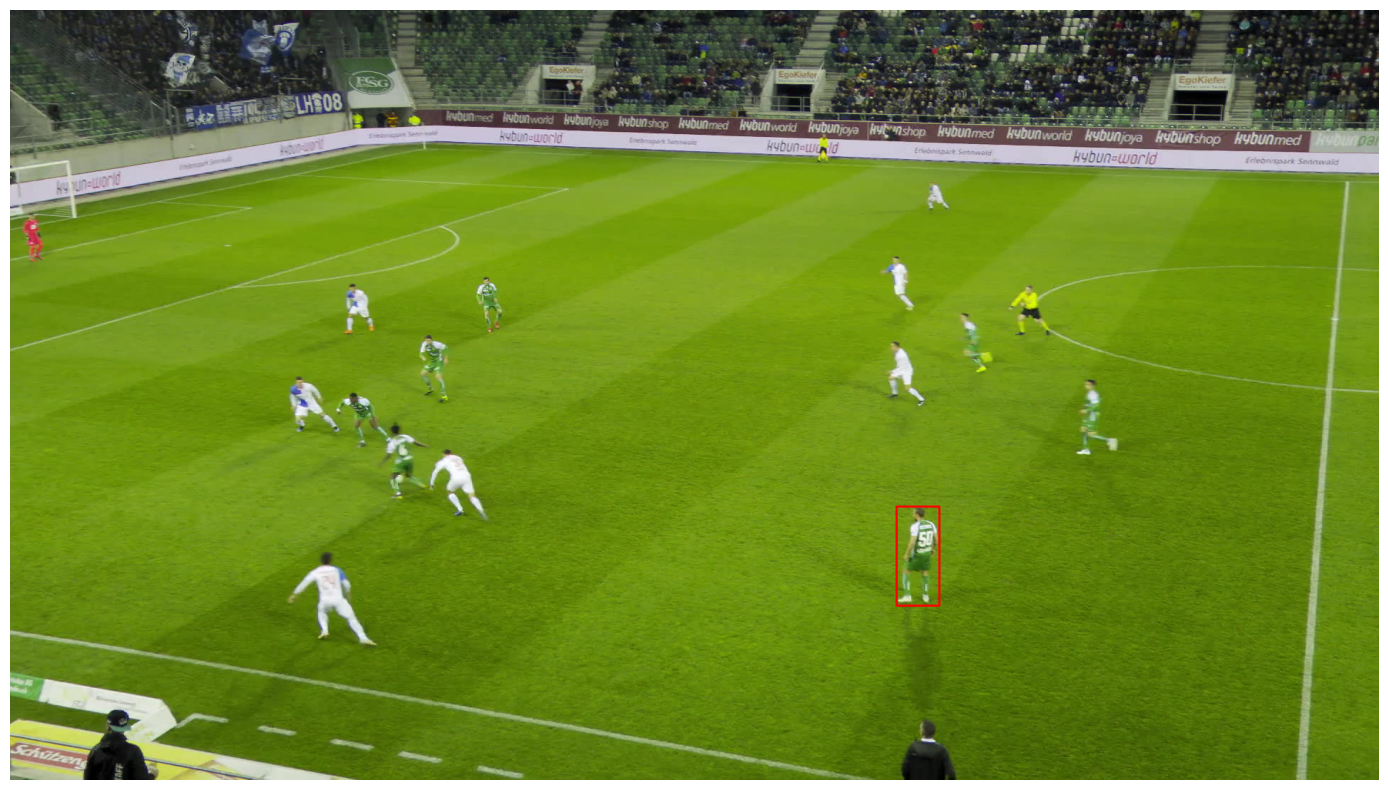

In [5]:
for img_path, ann in zip(sn.image_list, sn.gt):
    img = cv2.imread(soccer_net_path + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = image.draw_bboxes(img, np.array([ann[-2]]), image.Color.RED)

    plt.figure(figsize=(20, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    break
    

In [3]:
sizes = []
non_ball_sizes = []

for i, img_path in enumerate(sn.image_list):
    for bbox, label in zip(*sn.get_annotations(i)):
        size = abs(bbox[2]-bbox[0]) * abs(bbox[3]-bbox[1])
        if label == BALL_LABEL:
            sizes.append(size)
        else:
            non_ball_sizes.append(size)

In [4]:
print(f"Average ball size: {np.mean(sizes)}")
print(f"Ball size stdev: {np.std(sizes)}")
print(f"Max ball size: {np.max(sizes)}")
print(f"Min ball size: {np.min(sizes)}")
print()
print(f"Max player size: {np.max(non_ball_sizes)}")
print(f"Average non ball size: {np.mean(non_ball_sizes)}")
print(f"Non ball size stdev: {np.std(non_ball_sizes)}")
print(f"Max player size: {np.max(non_ball_sizes)}")
print(f"Min player size: {np.min(non_ball_sizes)}")
print()
print(f"Images with balls: {len(sizes)}")

Average ball size: 207.0206648697215
Ball size stdev: 512.1485918812576
Max ball size: 19920.0
Min ball size: 14.0

Max player size: 21240.0
Average non ball size: 5538.180102101389
Non ball size stdev: 3097.279324192817
Max player size: 21240.0
Min player size: 36.0

Images with balls: 2226


In [5]:
import pickle

with open("runs/train/20221123_2305/training_stats.pickle", "rb") as rfile:
    data = pickle.load(rfile)

In [6]:
data["train"][-1]

{'loss': 1.5154870167922814,
 'loss_ball_c': 1.7169028033181577,
 'loss_player_c': 0.5235618697012149,
 'loss_player_l': 0.0001333233746624066}